# C3 IoT Data Science Python Notebook Demo

# Data Science Life Cycle using C3 IoT

The typical data science workflow consists of the following steps:  

1. Explore the data
2. Create metrics
3. Cleanse and prepare a training set
4. Train a model
5. Evaluate the the performance of the model
6. If model is not good enough, return to 2

The C3 IoT data science setup is extremely flexible and most of these steps can be chosen to be carried out on the C3 IoT platform or the data science server. Depending on the data size and computations needed, different workflows can be chosen. 





## Table of Contents 

__[Section 1 - Connecting to C3 IoT](#first-section)__
* [A. Import C3 IoT Libraries](#1A)
* [B. Connect to C3 IoT and Import Types](#1B)
* [C. Get Help](#1C)
    
__[Section 2 - Work with Data from C3 IoT](#second-section)__
* [A. Query Relational Data](#2A)
* [B. Spec arguments: `filter`, `include`, `limit`, etc.](#2B)
* [C. Explore Timeseries](#2C)
  
__[Section 3 - Machine Learning](#third-section)__
* [A. Interactive Model Training & Prediction using C3 Platform](#3B)

# Section 1 - Connecting to C3 IoT<a class="anchor" id="first-section"></a>
## A. Import C3 IoT libraries<a class="anchor" id="1A"></a>

In [1]:
%matplotlib
%pylab inline

from pyc3 import typesys, timeseries, tsutils as tsu

import pandas as pd
from datetime import datetime

plt.rcParams['figure.figsize'] = (15,8)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# add helper functions
from sklearn import metrics
def split_train_test(ts, pct):
    df = tsu.to_DataFrame(ts)
    df = df[df['HasEverFailed']<1]
    df = df.drop(['HasEverFailed'],axis=1)
    df['new_index'] = ["{}_{}".format(s, d) for s,d in zip(df.source, df.index)]
    uniques=list(df.source.unique())
    chosen = list(random.choice(uniques,int(round(pct*len(uniques))),replace=False))
    df_train = df[df['source'].isin(chosen)].set_index('new_index').drop('source', axis=1)
    df_test = df[~df['source'].isin(chosen)].set_index('new_index').drop('source', axis=1)
    
    return df_train, df_test

def split_train_test_date(ts, date_split):
    df = tsu.to_DataFrame(ts)
    df['new_index'] = ["{}_{}".format(s, d) for s,d in zip(df.source, df.index)]

    df_train = df[df.index <= date_split].set_index('new_index').drop('source', axis=1)
    df_test = df[df.index > date_split].set_index('new_index').drop('source', axis=1)
    
    return df_train, df_test

def plot_roc(predictions, actuals): 
    plt.figure(figsize=(8,8))
    fpr, tpr, thresholds = metrics.roc_curve(actuals, predictions)
    auc = metrics.roc_auc_score(actuals, predictions)
    plt.plot(fpr, tpr, label="auc:{:.3f}".format(auc))
    plt.title('ROC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc=4)


## B. Connect to C3 IoT and Import Types<a class="anchor" id="1B"></a>

#### C3ServerConnection
`C3ServerConnection` is the central object of python typesystem. It is:
- a handle to a given C3 environment, able to emit REST calls and parse the answer.
- a container for all types definition
- a collection of helper functions designed to make life easier

#### Requirements
To connect to an environment you need:
    - url for that environment
    - tenant / tag you want to connect to
    - appropriate user and password

#### Authentication:
At the creation of the C3ServerConnection instance, system will interactively ask you for user name and password. System will then connect to given C3 environment to get a C3 Auth Token (i.e. authentication cookie). User name and password are therefore not stored.

In [46]:
c3 = typesys.C3ServerConnection("https://lightbulb-demo.c3-e.com/",tenant = 'lightbulb',tag = 'demo')

User: payne_nicholas@cat.com
Password: ········
Valid username and password


#### Import All Types
Once C3ServerConnection has been created, types can be imported from given C3 environment.

**`C3ServerConnection.importAll()`** will download type definition from the environment, then parse the response and instantiate the appropriate types.

In [47]:
c3.importAll()

Tag.getModules took   971.6620 ms
Imported 2413 types from lightbulb/demo in  10903.200 ms


#### C3 Types 101

Types provide a convenient way for C3 users to easily interact with their data and their data model across languages. It represents the data model in an abstract fashion and can be implemented in whatever language chosen by the user, Java, JavaScript, or here Python.

Types are entities in C3 data model. As such they have:
- fields, containing information for particular instances of that type
- methods, able to perform certain operations related to that type

Once types have been imported, they are declared in **`C3ServerConnection.type`** scope. For convenience, the same types are also available directly in the **`C3ServerConnection`** scope.


## C. Get Help<a class="anchor" id="1C"></a>

#### Documentation
Documentation is critical, so special effort was put to document and provide examples on how to use C3 Type System in Python.

Documentation comes from 2 sources:
- C3 Platform documentation, parsed along with the types and presented when available
- Python implementation of the type system, documentation is available for python specific functions as well as types declaration for fields or methods.

#### Access Help
Help can be accessed in at least 3 ways:
- **`?c3.Lightbulb`**
- **`c3.grid(Lightbulb)`
- **`c3.Lightbulb(`** and hit **[TAB]**
- **`c3.Lightbulb.__doc__`**

#### Look up Documentation on LightBulb Type

In [48]:
?c3.LightBulb

#### View Fields & Methods defined on LightBulb Type

Fields and their types can be accessed using convenience function **`C3ServerConnection.grid`** on type of interest

In [49]:
c3.grid(c3.LightBulb)

{
    Type: LightBulb, 
    Primitive Fields: {
        bulbType :  str, 
        id :  str, 
        name :  str, 
        startDate :  datetime, 
        typeIdent :  str, 
        version :  int, 
        wattage :  float
    }, 
    Reference Fields: {
        manufacturer :  Manufacturer, 
        meta :  Meta
    }, 
    Array Fields: {
        versionEdits :  [VersionEdit]
    }, 
    Functions: {
        afterCreate :  function([LightBulb] objs) => [ObjError], 
        afterRemove :  function([LightBulb] objs) => [ObjError], 
        afterUpdate :  function([LightBulb] objs) => [ObjError], 
        batchIds :  function(str filter, int suggestedNumBatches, int batchSize) => [str], 
        beforeCreate :  function([LightBulb] objs) => ObjList, 
        beforeRemove :  function([LightBulb] objs) => ObjList, 
        beforeUpdate :  function([LightBulb] objs) => ObjList, 
        beginUpsertToSecondaryDs :  function(TypeRef type) => SecondaryDsUpsert, 
        binIds :  function(i

#### Look up Documentation for Methods

In [50]:
?c3.LightBulb.fetch

# Section 2 - Work with Data from C3 IoT<a class="anchor" id="second-section"></a>

## A. Query Relational Data<a class="anchor" id="2A"></a>

Relational data stored in C3 Platform can be accessed using **`fetch`** method on type of interest.

In [51]:
fres = c3.SmartBulb.fetch(limit=10)

SmartBulb.fetch took   198.3180 ms


In [52]:
c3.grid(fres)

,bulbType,currentFixture,latitude,longitude,lumensUOM,manufacturer,meta,powerUOM,startDate,temperatureUOM,typeIdent,version,voltageUOM,wattage
id,,,,,,,,,,,,,,
SMBLB1,LED,{u'id': u'fixt1'},37.485967,-122.242820,{u'id': u'lumen'},{u'id': u'Bell'},"{u'updated': u'2018-01-19T19:36:58Z', u'create...",{u'id': u'watt'},2011-01-01T04:00:00-08:00,{u'id': u'degrees_fahrenheit'},SMRT_BLB,65537,{u'id': u'volt'},9.5
SMBLB10,LED,{u'id': u'fixt10'},37.484950,-122.233511,{u'id': u'lumen'},{u'id': u'GE'},"{u'updated': u'2018-01-19T19:36:58Z', u'create...",{u'id': u'watt'},2011-01-01T04:00:00-08:00,{u'id': u'degrees_fahrenheit'},SMRT_BLB,65537,{u'id': u'volt'},9.5
SMBLB100,INCAN,{u'id': u'fixt100'},37.483786,-122.244751,{u'id': u'lumen'},{u'id': u'GE'},"{u'updated': u'2018-01-19T19:36:58Z', u'create...",{u'id': u'watt'},2011-01-01T04:00:00-08:00,{u'id': u'degrees_fahrenheit'},SMRT_BLB,65537,{u'id': u'volt'},60.0
SMBLB11,LED,{u'id': u'fixt11'},37.487546,-122.230699,{u'id': u'lumen'},{u'id': u'Philips'},"{u'updated': u'2018-01-19T19:36:58Z', u'create...",{u'id': u'watt'},2011-01-01T04:00:00-08:00,{u'id': u'degrees_fahrenheit'},SMRT_BLB,65537,{u'id': u'volt'},9.5
SMBLB12,LED,{u'id': u'fixt12'},37.492409,-122.236505,{u'id': u'lumen'},{u'id': u'Bell'},"{u'updated': u'2018-01-19T19:36:58Z', u'create...",{u'id': u'watt'},2011-01-01T04:00:00-08:00,{u'id': u'degrees_fahrenheit'},SMRT_BLB,65537,{u'id': u'volt'},9.5
SMBLB13,LED,{u'id': u'fixt13'},37.481391,-122.237007,{u'id': u'lumen'},{u'id': u'GE'},"{u'updated': u'2018-01-19T19:36:58Z', u'create...",{u'id': u'watt'},2011-01-01T04:00:00-08:00,{u'id': u'degrees_fahrenheit'},SMRT_BLB,65537,{u'id': u'volt'},9.5
SMBLB14,LED,{u'id': u'fixt14'},37.491864,-122.232971,{u'id': u'lumen'},{u'id': u'Bell'},"{u'updated': u'2018-01-19T19:36:58Z', u'create...",{u'id': u'watt'},2011-01-01T04:00:00-08:00,{u'id': u'degrees_fahrenheit'},SMRT_BLB,65537,{u'id': u'volt'},9.5
SMBLB15,LED,{u'id': u'fixt15'},37.490230,-122.235899,{u'id': u'lumen'},{u'id': u'GE'},"{u'updated': u'2018-01-19T19:36:58Z', u'create...",{u'id': u'watt'},2011-01-01T04:00:00-08:00,{u'id': u'degrees_fahrenheit'},SMRT_BLB,65537,{u'id': u'volt'},9.5
SMBLB16,LED,{u'id': u'fixt16'},37.488516,-122.231248,{u'id': u'lumen'},{u'id': u'Philips'},"{u'updated': u'2018-01-19T19:36:58Z', u'create...",{u'id': u'watt'},2011-01-01T04:00:00-08:00,{u'id': u'degrees_fahrenheit'},SMRT_BLB,65537,{u'id': u'volt'},9.5


## B. Spec arguments: `filter`, `include`, `limit`, etc.<a class="anchor" id="2B"></a>

### `limit`

Limit field on a spec allows to only query a fixed number of sources.

Typically, if limit argument is not present, it is defaulted to 2000.

### `include`

Include field on a spec allows to select only certain columns, effectively limiting the I/O, improving latency, and memory load on the python client.

### `filter`

Filter argument on a spec allows to select certain sources based on logical conditions on sources fields.
Logic is written in javascript like syntax and therefore quite expressive.

In [53]:
query = c3.SmartBulb.fetch(filter="manufacturer== 'GE' && startDate > dateTime('2010-01-01')", 
                            limit=10, 
                            explain=True)

#c3.grid(query)
type(c3.grid(query))

SmartBulb.fetch took   216.9061 ms


pandas.core.frame.DataFrame

In [54]:
for plan in query.queryPlans[:6]:
    print plan['sql']

SELECT T.CURRENTPREDICTION_R, T.BULBOVERHEATSTATUS_TIMES_NPA_T, T.BULBOVERHEATSTATUS_TIMES_NPA_I, T.BULBOVERHEATSTATUS_VALUE_I, T.LATITUDE_D, T.LONGITUDE_D, T.LUMENSUOM_R, T.POWERUOM_R, T.TEMPERATUREUOM_R, T.VOLTAGEUOM_R, T.CURRENTFIXTURE_R, T.ID, T.VERSION, T.NAME, T.TENANT_TAG_ID, T.CREATED, T.CREATED_I, T.CREATED_BY, T.UPDATED, T.UPDATED_I, T.UPDATED_BY, T.META_TIMESTAMP_T, T.META_TIMESTAMP_I, T.META_COMMENT, T.PROVENANCE, T.SOURCE, T.BULBTYPE_S, T.WATTAGE_D, T.MANUFACTURER_R, T.STARTDATE_T, T.STARTDATE_I, T.TYPE_IDENT
FROM C3_2_LGHT_BLB T
WHERE T.TENANT_TAG_ID=:v1 AND ((T.TYPE_IDENT LIKE 'SMRT\_BLB%') AND (T.MANUFACTURER_R=:v2 AND T.STARTDATE_T>TO_TIMESTAMP(:v3, 'YYYY-MM-DD"T"HH24:MI:SS.MSH:M')))
ORDER BY T.ID
LIMIT 11


## C. Explore Timeseries<a class="anchor" id="2C"></a>

** What are C3 Metrics? **

C3 Metrics are metadata used to quickly and scalably aggregate and transform raw data into time series. Metrics can be implemented in the platform or defined on the fly in a Python notebook. The list of transforms is described in the [Function Library wiki page](https://c3energy.atlassian.net/wiki/display/ENG/Function+Library)


The easiest way to compute timeseries data from a C3 environment is to use the **`evalMetrics`** API on types where it is defined.

**`evalMetrics`** take an **`EvalMetricsSpec`** object as argument

**`EvalMetricsSpec`** contains a few important fields:
- `expressions` : list of metrics to evaluate
- `ids` : list of ids of sources on which we want to evaluate given metrics
- `start` and `end` : beginning and end of the slice of the series to query
- `interval` : granularity of timeseries

To view some metrics that have already been implemented in the platform, call fetch on the CompoundMetric type: 

In [55]:
c3.grid(c3.CompoundMetric.fetch())

CompoundMetric.fetch took   188.1621 ms


,acronym,description,expression,label,meta,name,unit,variables,version
id,,,,,,,,,
ActionQueueComputingActions,ActionQueueComputingActions,ActionQueueComputingActions,InvalidationQueueComputingActions,ActionQueueComputingActions,"{u'updated': u'2018-01-19T19:33:09Z', u'create...",ActionQueueComputingActions,None,"[{u'dataType': u'string', u'name': u'QTYPE', u...",1
ActionQueueComputingEntries,ActionQueueComputingEntries,ActionQueueComputingEntries,InvalidationQueueComputingEntries,ActionQueueComputingEntries,"{u'updated': u'2018-01-19T19:33:09Z', u'create...",ActionQueueComputingEntries,None,"[{u'dataType': u'string', u'name': u'QTYPE', u...",1
ActionQueueFailed,ActionQueueFailed,ActionQueueFailed,InvalidationQueueFailed,ActionQueueFailed,"{u'updated': u'2018-01-19T19:33:09Z', u'create...",ActionQueueFailed,None,"[{u'dataType': u'string', u'name': u'QTYPE', u...",1
ActionQueueInitial,ActionQueueInitial,ActionQueueInitial,InvalidationQueueInitial,ActionQueueInitial,"{u'updated': u'2018-01-19T19:33:09Z', u'create...",ActionQueueInitial,None,"[{u'dataType': u'string', u'name': u'QTYPE', u...",1
ActionQueuePending,ActionQueuePending,ActionQueuePending,InvalidationQueuePending,ActionQueuePending,"{u'updated': u'2018-01-19T19:33:09Z', u'create...",ActionQueuePending,None,"[{u'dataType': u'string', u'name': u'QTYPE', u...",1
ActionQueueUnreviewedFailed,ActionQueueUnreviewedFailed,ActionQueueUnreviewedFailed,InvalidationQueueUnreviewedFailed,ActionQueueUnreviewedFailed,"{u'updated': u'2018-01-19T19:33:09Z', u'create...",ActionQueueUnreviewedFailed,None,"[{u'dataType': u'string', u'name': u'QTYPE', u...",1
AmbientTemperatureAverageDailyMinimum,AmbientTemperatureAverageDailyMinimum,AmbientTemperatureAverageDailyMinimum,"avg(eval('DAY', AmbientTemperatureMinimum))",AmbientTemperatureAverageDailyMinimum,"{u'updated': u'2018-01-19T19:33:09Z', u'create...",AmbientTemperatureAverageDailyMinimum,None,None,1
AmbientTemperatureCelsius,AmbientTemperatureCelsius,AmbientTemperatureCelsius,"treatAsUnit('degrees_celsius', (AmbientTempera...",AmbientTemperatureCelsius,"{u'updated': u'2018-01-19T19:33:09Z', u'create...",AmbientTemperatureCelsius,{u'id': u'degrees_celsius'},None,1
AmbientTemperatureExtreme,AmbientTemperatureExtreme,AmbientTemperatureExtreme,available(AmbientTemperatureMaximum) && availa...,AmbientTemperatureExtreme,"{u'updated': u'2018-01-19T19:33:09Z', u'create...",AmbientTemperatureExtreme,None,None,1


In [56]:
c3.grid(c3.SimpleMetric.fetch(filter = "name=='AveragePower'"))

SimpleMetric.fetch took   128.5779 ms


,acronym,description,expression,label,meta,name,path,srcType,version
id,,,,,,,,,
AveragePower_SmartBulb,AveragePower,AveragePower,avg(avg(normalized.data.power)),AveragePower,"{u'updated': u'2018-01-19T19:33:14Z', u'create...",AveragePower,bulbMeasurements,{u'typeName': u'SmartBulb'},1


Metrics can also be defined on the fly in a data science notebook. This allows data scientists to quickly test out prototyped metrics before deciding which metrics should be implemented in the platform. 

In [57]:
# Define custom metric, name it "TotalPower".  It should be the total power consumed by all bulbs in a BUILDING
# We are going to build a model to forecast energy consumption using this metric.
# Hint: Look at definition of AveragePower above..this was defined on a SmartBulb, how can we modify for 
# total power and for a building?
new_metric = c3.SimpleMetric(id ="TotalPower_Building" , name ="TotalPower" , 
                             srcType= "Building",
                             path = "apartments.fixtures.bulbHistory.from.bulbMeasurements",
                                   expression="sum(sum(normalized.data.power))")

In [58]:
start=datetime(2011,1,1)
end=datetime(2012,1,1)
interval='HOUR'

expressions = ["Holiday","DayOfWeek","MonthOfYear","HourOfDay","TotalPower"]

spec = c3.EvalMetricsSpec(expressions=expressions,
                          filter="startsWith(id, 'bld')", 
                          interval=interval,
                          start=start,
                          end=end, limit=50)

em = c3.Building.evalMetricsWithMetadata(spec,[new_metric])  

Building.evalMetricsWithMetadata took  6431.0889 ms


### `to_timeseries`

`to_timeseries` is a convenience function defined on `C3ServerConnection` to convert **`EvalMetricsResult`** to a dictionary of **`pyc3.TimeSeries`**

In [59]:
emr = tsu.to_timeseries(em)

### TimeSeries manipulation

### Grid view
TimeSeries objects can be analyzed in a grid view, it works only for very small series.
Grid is the view by default when you display a timeseries.

In [60]:
ts = emr.get("bld2", {}).get('data')
ts

Time,DayOfWeek,HourOfDay,TotalPower,MonthOfYear,Holiday
2011-01-01 00:00:00,6.0,0.0,0.0,1.0,0.0
2011-01-01 01:00:00,6.0,1.0,0.0,1.0,0.0
2011-01-01 02:00:00,6.0,2.0,0.0,1.0,0.0
2011-01-01 03:00:00,6.0,3.0,0.0,1.0,0.0
2011-01-01 04:00:00,6.0,4.0,0.0,1.0,0.0
2011-01-01 05:00:00,6.0,5.0,0.0,1.0,0.0
2011-01-01 06:00:00,6.0,6.0,0.0,1.0,0.0
2011-01-01 07:00:00,6.0,7.0,0.0,1.0,0.0
2011-01-01 08:00:00,6.0,8.0,0.0,1.0,0.0
2011-01-01 09:00:00,6.0,9.0,0.0,1.0,0.0


### Chart View
**`pyc3.tsutils`** is a library written to operate on timeseries. Convenient static and interactive plotting functions are available in this library. 

#### Static Plotting

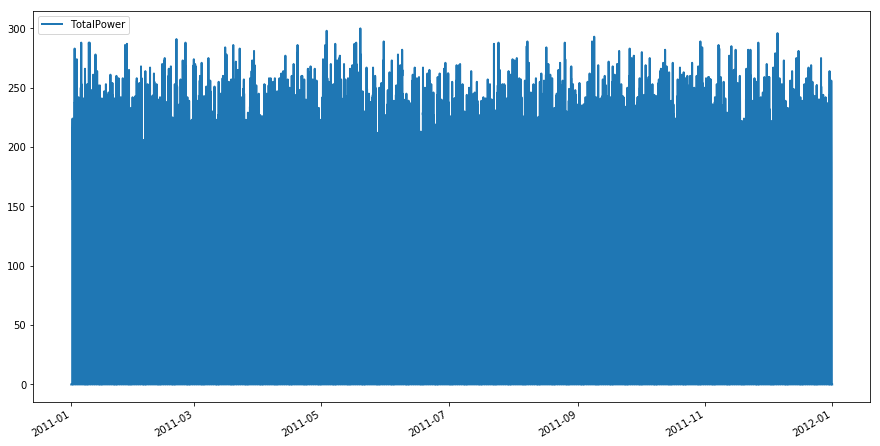

In [61]:
tsu.plot(ts[['TotalPower'], "2011-01-01":"2012-01-01"])

TimeSeries objects can be sliced 2 ways:
- by signal (i.e. Metrics)
- by time

**Syntax:**

`ts[[Metric1,Metric2],start:end]`

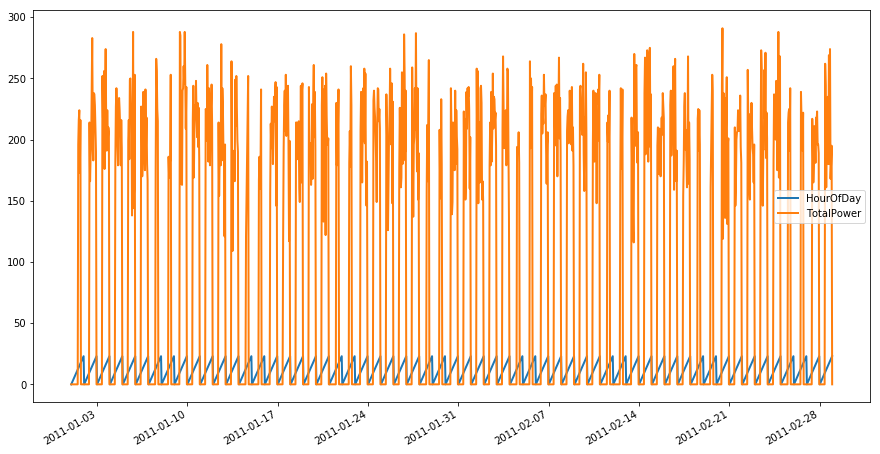

In [62]:
tsu.plot(ts[["HourOfDay","TotalPower"], "2011-01-01":"2011-03-01"])

#### Interactive Plotting

In [63]:
tsu.iplot(ts)

Server running in the folder /usr/local/share/notebooks/Lab Files at 127.0.0.1:49182


# Section 3 - Machine Learning <a class="anchor" id="third-section"></a>

## Interactive Model Training & Prediction using C3 Platform<a class="anchor" id="3B"></a>
- Data scientists have the freedom and flexibility to use open source libraries such as scikit-learn to perform model training and prediction on their local servers, and then persist them to the C3 platform directly by creating custom model objects with the fields of the model type specified.
- The option to train and predict also exists in the C3 Platform by emitting REST requests. This option may be more appealing in order to simplify and standardize the process among collaborating data scientists and to ensure conformity among the persisted model objects.

### Machine Learning Models in C3 Platform

- Machine Learning algorithms are treated as application code in C3
- Trained models are stored as instances of C3 Types with fields (e.g. name, trained boolean, and array of features) and methods (e.g. train, predict)
- To persist a locally trained model, first create a Python dictionary that contains the serialized trained model as well as the other fields of the `PythonMachineLearningClassifier` model type. Then call the upsert method of the `PythonMachineLearningClassifier` type.

### Train Model on C3 Platform

In [67]:
# Apologies : Required step due to bug in python Type System currently fixed in a later version
from copy import deepcopy
argType = deepcopy(c3.PythonMachineLearningPipeline.predict.__valueType__.__arguments__[1])
returnType = deepcopy(c3.PythonMachineLearningPipeline.predict.__valueType__.__returnValueType__)
c3.PythonMachineLearningRegression.predict.__valueType__.__arguments__[1] = argType
c3.PythonMachineLearningRegression.predict.__valueType__.__returnValueType__ = returnType

##### Define pipeline

In [68]:
rf = c3.PythonMachineLearningRegression(
        id = "RandomForestRegressionBase",
        name = "Building Power Random Forest Regression",
        steps= [
            c3.MachineLearningEstimator(
                name="step1",
                technique= {"name":"preprocessing.StandardScaler"}),
            c3.MachineLearningEstimator(
                name="step2",
                technique={"name":"ensemble.RandomForestRegressor", 
                            "parameters": {"n_estimators": 50, 
                                           "max_depth": 5}})
        ])

##### Split data between training and testing

In [69]:
df_train, df_test = split_trainc3.PythonMachineLearningRegression.train_test_date(emr, datetime(2011,9,30))

In [82]:
?c3.PythonMachineLearningRegression.train

##### Train model
- To train a model on the C3 platform, emit a REST request to the C3 platform by calling the `train` method on the `PythonMachineLearningRegression` type, passing to the method the untrained pipeline, the training dataset, and the target label. The platform will return a trained model.

In [83]:
trained_model = c3.PythonMachineLearningRegression.train(rf,c3.to_dataset(df_train),'TotalPower') #ENTER APPROPRIATE ARGUMENTS HERE

PythonMachineLearningRegression.train took  2265.9500 ms


In [84]:
trained_model.score

0.9324142507153961

In [85]:
predictions = c3.PythonMachineLearningRegression.predict(trained_model,c3.to_dataset(df_test))
ds_pred = c3.from_dataset(predictions)

PythonMachineLearningRegression.predict took  2340.0600 ms


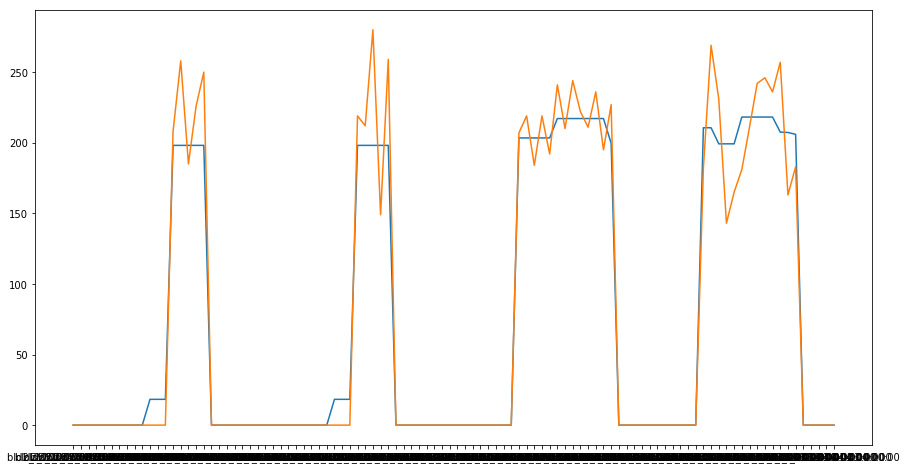

In [86]:
plt.plot(ds_pred[0:100])
plt.plot(df_test["TotalPower"][0:100])

### Persist Platform-Trained Model to C3 Platform

In [87]:
trained_model.id = 'DEMO-platform_trained'
trained_model.name = 'Platform Trained Random Forest Regression - Matt'

In [88]:
c3.PythonMachineLearningRegression.upsert(trained_model) 

PythonMachineLearningRegression.upsert took  1349.6051 ms


{
    "type": {
        "name": "PythonMachineLearningRegression"
    }, 
    "id": "DEMO-platform_trained", 
    "meta": {
        "refreshCalcFields": true, 
        "calcFieldsToRefresh": [
            "trained"
        ]
    }, 
    "productionReady": false, 
    "version": 65544
}

In [89]:
c3.grid(c3.PythonMachineLearningRegression.fetch())

PythonMachineLearningRegression.fetch took  2218.2798 ms


,features,meta,model,name,productionReady,score,steps,trained,version
id,,,,,,,,,
DEMO-Oli-platform_trained,"[DayOfWeek, HourOfDay, MonthOfYear, Holiday]","{u'updated': u'2018-01-24T19:58:13Z', u'create...","""ccopy_reg\n_reconstructor\np1\n(csklearn.pipe...",Platform Trained Random Forest Regression - Ol...,False,0.932404,[{u'technique': {u'name': u'preprocessing.Stan...,True,65537
DEMO-platform_trained,"[DayOfWeek, HourOfDay, MonthOfYear, Holiday]","{u'updated': u'2018-01-24T20:04:45Z', u'create...","""ccopy_reg\n_reconstructor\np1\n(csklearn.pipe...",Platform Trained Random Forest Regression - Matt,False,0.932414,[{u'technique': {u'name': u'preprocessing.Stan...,True,65544
DEMOEDT-platform_trained,"[DayOfWeek, HourOfDay, MonthOfYear, Holiday]","{u'updated': u'2018-01-24T19:48:59Z', u'create...","""ccopy_reg\n_reconstructor\np1\n(csklearn.pipe...",Platform Trained Random Forest Regression - Ed T.,False,0.932441,[{u'technique': {u'name': u'preprocessing.Stan...,True,65537
